<a href="https://colab.research.google.com/github/LazySeagull/classification--algo-questions/blob/main/classification_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784")

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X = mnist['data']
y = mnist['target']

print(X.shape , "\n")
print(y.shape)



(70000, 784) 

(70000,)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def print_digit(X , index : int , Y) -> None :
  digit = X.iloc[index]
  plt.imshow(digit.values.reshape(28 , 28) , cmap = "binary")
  plt.axis("off")
  plt.show()
  Y_digit = Y[index]
  print(F"\nThe digit is {Y_digit}")


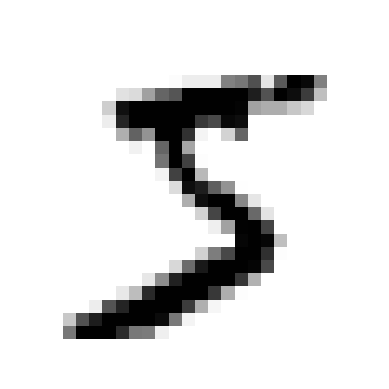


The digit is 5


In [ ]:
print_digit(X , 0 , y)

In [ ]:
X_train , y_train , X_test , y_test = X[:60000] , y[:60000] , X[60000:] , y[60000 : ]

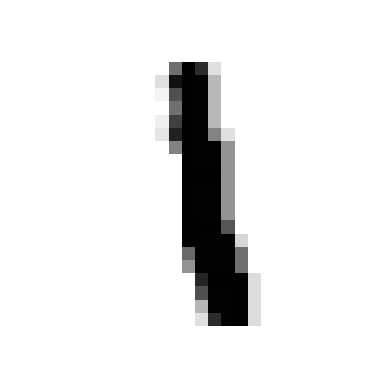


The digit is 1


In [ ]:
print_digit(X_train , 6 , y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
print(knn_clf.predict([X_train.iloc[6]] ))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['1']


In [ ]:
#cross val

from sklearn.model_selection import cross_val_score


score = cross_val_score(knn_clf , X_train , y_train , cv = 5 , scoring="accuracy")
print(score)

[0.96975    0.97016667 0.96933333 0.96816667 0.969     ]


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_train = cross_val_predict(knn_clf , X_train , y_train , cv=3)

In [ ]:
from sklearn.metrics import precision_score , recall_score

recall = recall_score(y_train , y_pred_train, average='macro')
print(recall , "\n")
precision = precision_score(y_train , y_pred_train, average='macro')
print(precision , "\n")

0.9669341316176434 

0.967895609653832 



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  28.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  25.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  25.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  26.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  26.8s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  26.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  26.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  26.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  25.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  25.6s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  26.2s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [29]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [30]:
grid_search.best_score_

np.float64(0.9716166666666666)

In [32]:
knn_best_grid = grid_search.best_estimator_

In [34]:
knn_best_self = KNeighborsClassifier(n_neighbors = 4 , weights = "distance")
knn_best_self.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [36]:
y_pred_grid = cross_val_predict(knn_best_grid , X_test , y_test , cv = 3)
y_pred_self = cross_val_predict(knn_best_self , X_test , y_test , cv = 3)

In [38]:
precision_score_grid_best = precision_score(y_pred_grid , y_test , average = "macro")
precision_score_self_best = precision_score(y_pred_self , y_test , average = "macro")

recall_score_grid_best = recall_score(y_pred_grid , y_test , average = "macro")
recall_score_self_best = recall_score(y_pred_self , y_test , average = "macro")



print(precision_score_grid_best,"\n")
print(precision_score_self_best , "\n" ,recall_score_grid_best , "\n" , recall_score_self_best )



0.9403856118462117 

0.9403856118462117 
 0.9422015858141111 
 0.9422015858141111


In [44]:
cross_val_score_best = cross_val_score(knn_best_self , X_test , y_test , cv = 5)
print(cross_val_score_best)

[0.9305 0.9375 0.9445 0.9655 0.968 ]


In [45]:
print(grid_search.best_score_)

0.9716166666666666


In [46]:
# question 2







#shifting the image then add that into the training set and then see the results

